# Lecture 2: Gradient Descente

# Problem Statement
Find a point in $\mathbb{R}^{2}$ with the least average Euclidean distance to a set of arbitrary points

# Visualizing the problem

In [9]:
from random import Random
SEED = 5
random_gen = Random(x = SEED)
def generate_random_numbers(N=1000):

    lst_x = [random_gen.uniform(0,1) for _ in range(N)]
    lst_y = [random_gen.uniform(0, 1) for _ in range(N)]
    return (lst_x, lst_y)

data_x, data_y = generate_random_numbers()
print(data_x[:10])
print(data_y[:10])

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]
[0.8713187027692235, 0.039767712548386625, 0.5888551653281111, 0.11745374212114823, 0.721120830858009, 0.6113236281477744, 0.6120458139259322, 0.22152129960368494, 0.9490212551961823, 0.11102495123278444]


(-1.0, 2.0)

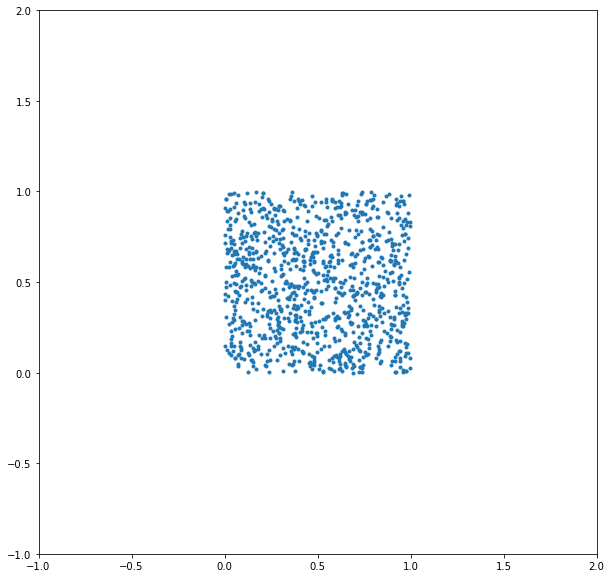

In [10]:
from matplotlib.pyplot import figure
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x= data_x, y= data_y, marker=".")
ax.set_xlim(left=-1, right=2)
ax.set_ylim(top= 2, bottom=-1)

# The loss function
Let:
- The solution: ($x_{p}$, $y_{p}$)
- The dataset $\mathbb{D}$ is a {($x^{i}$, $y^{i}$)}
- $\mathbb{L}$ be the loss function and the solution be
$$(x_{p}, y_{p}) = argmin(\mathbb{L})$$
$$where\;\mathbb{L} = \frac{1}{N} \sum_{i=0}^{N-1}[(x_{i} - x_{p})^{2} + (y_{i} - y_{p})^{2}]^{\frac{1}{2}}$$

# Evaluate loss

In [11]:
from math import sqrt
def loss(x_p, y_p):
    return(
        (1/len(data_x)) * sum(
        [sqrt( (x_i - x_p)**2 + (y_i - y_p)**2) for x_i, y_i in zip(data_x, data_y)]
    )
    )

# Visualize loss

In [12]:
STEP = 0.01
MESH_SIZE = 300
x_mesh = [ -1+i*STEP for i in range(MESH_SIZE)]
y_mesh = [ -1+i*STEP for i in range(MESH_SIZE)]
loss_mesh = [
    [loss(x_current, y_current) for y_current in y_mesh]
        for x_current in x_mesh

]

In [ ]:
loss_mesh

C:\Users\EGYPT\AppData\Local\Temp\ipykernel_27172\1411842693.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


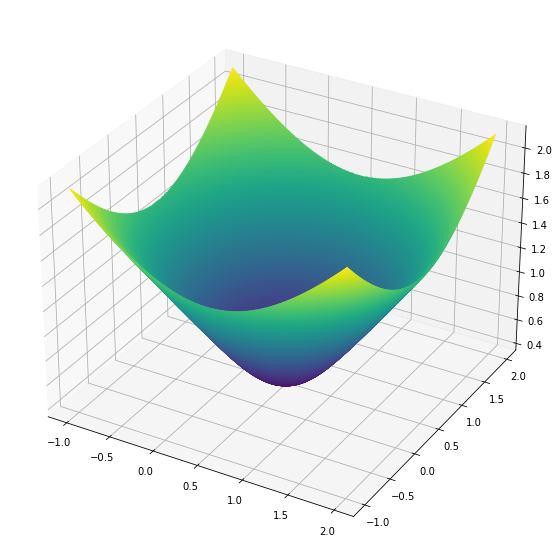

In [13]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection = "3d")
ax.contour(x_mesh, y_mesh, loss_mesh, levels = 500)
fig.show()

# Numeric Conceptualization of Derivatives
It comes for the main definition of the derivative
<br><br>
$\frac{\partial \mathbb{L}}{\partial x} = \lim_{h \to 0} \frac{\mathbb{L}(x+h) - \mathbb{L}(x)}{h}$
<br><br>
By replacing the asymptotically infinitesimal by pragmatically small of values we can get a definition of deriviative that can be numerically computed

# Optimization Loop

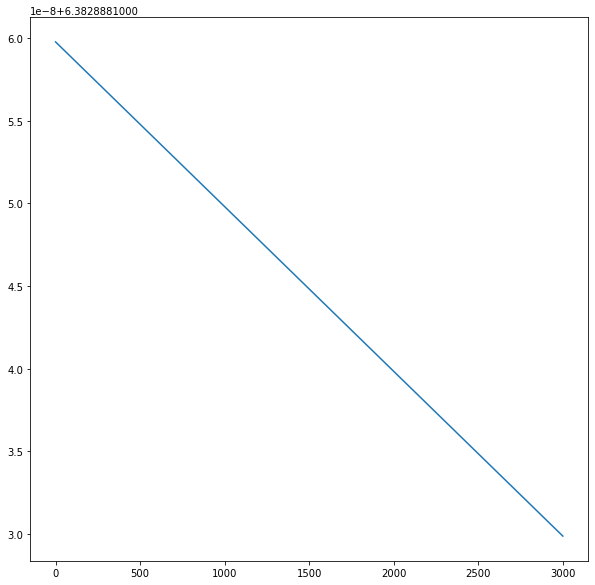

In [23]:
x_p, y_p = 5,5 # initialize with any point
EPOCHS = 3000
DELTA = 0.00000000001
epoch_losses = []
H= 0.001
for _ in range(EPOCHS):
    epoch_losses.append(loss(x_p, y_p))
    dloss_dx = (loss(x_p + H , y_p) - loss(x_p, y_p))/H
    dloss_dy = (loss(x_p, y_p+H) - loss(x_p, y_p))/H
    x_p -= dloss_dx*DELTA
    y_p -= dloss_dy*DELTA
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(epoch_losses)

In [ ]:
print(x_p, y_p)

# Closed Form solution

In [ ]:
def cal_grad(x_p, y_p):
    sum_x , sum_y = 0, 0
    c = -1/len(data_x)
    for x_i, y_i in zip(data_x, data_y):
        inv_sqrt = ( (x_i-x_p) ** 2 + (y_i-y_p) ** 2 ) ** (-0.5)
        sum_x += inv_sqrt*(x_i -x_p)
        sum_y += inv_sqrt*(y_i - y_p)
    return c*sum_x, c*sum_y

In [ ]:
x_p , y_p = 0.5,0.5
H= 0.001
dloss_dx = (loss(x_p + H , y_p) - loss(x_p, y_p))/H
dloss_dy = (loss(x_p, y_p+H) - loss(x_p, y_p))/H
print(f" closed form :{dloss_dx, dloss_dy}")
print(f" closed form :{cal_grad(x_p,y_p)}")

In [ ]:
from torch import(
    tensor,
    sum as torch_sum,
    rand,
    no_grad
)
from torch.random import manual_seed

In [ ]:
N = 1000
gen = manual_seed(5)
data = rand(size=(1000, 2), generator=gen)

In [ ]:
print(type(data) , data.shape, data[0:])

# Optimization Loop

In [ ]:
loss = lambda pnt : torch_sum( torch_sum( (data-pnt)**2,dim=1)**.5)
pnt = tensor((5.,5.))#initially
pnt.requires_grad = True
for _ in range(1000):
    curr_loss = loss(pnt)
    curr_loss.backward() # backprop
    with no_grad():
        pnt -= 0.001*pnt.grad.data #get the gradient calc
        pnt.grad.zero_()

print(pnt)